# Đồ án thực hành Nhập môn Khoa học Dữ liệu

### Nhóm: 12
### Thành viên:
- 21120531: Nguyễn Văn Phúc
- 20120409: Trần Thanh Tùng


## **Mô tả đồ án:**
- Thu thập dữ liệu của 10000 anime trên website.
- Từ dữ liệu thu thập được tiến hành phân tích, khám phá, xử lý và đưa ra mô hình phù hợp.

#### **Nguồn:**  [myanimelist.net](https://myanimelist.net)

## Import thư viện

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from datetime import datetime
import warnings
warnings.simplefilter('ignore')
sns.set_theme()

## Thu thập dữ liệu

### Thông tin về dữ liệu

- Dữ liệu được sử dụng trong đồ án là tập dữ liệu về các **bộ anime** với những thông tin được lưu trữ liên quan tới những yếu tố được quan tâm với một bộ phim hoạt hình.
- Tập dữ liệu được cào và download trực tiếp thông qua [đường dẫn](https://myanimelist.net/anime.php).

### Dữ liệu được thu thập thế nào ?

- Nhóm tiến hành crawl dữ liệu với thư viện scrapy.
- Ở đây nhóm không crawl hết toàn bộ các anime mà chỉ crawl 10000 bộ nổi nhất được sắp xếp trên web.

## Khám phá dữ liệu

### Đọc dữ liệu từ file json vào dataframe

Dữ liệu sau khi thu thập được lưu duy nhất trong 1 file JSON duy nhất là dataset/animes_info.json

In [2]:
%cd ..
anime_df = pd.read_json('anime_crawler/anime_crawler/dataset/animes_data.json')

/home/irene/Nhóm 12


In [3]:
anime_df.head()

,Name,Score,Rank,Type,Episodes,Aired,Premiered,Producers,Studios,Genres,Popularity,Members,Favorites
0,Fullmetal Alchemist: Brotherhood,9.11,1,TV,64,"Apr 5, 2009 to Jul 4, 2010",Spring 2009,"[Mainichi Broadcasting System, Studio Moriken,...",[Bones],"[Adventure, Drama, Fantasy, Action]",#3,"3,037,641","211,082"
1,Bleach: Sennen Kessen-hen,9.10,2,TV,13,"Oct 11, 2022 to Dec 27, 2022",Fall 2022,"[TV Tokyo, Shueisha, Dentsu, Aniplex]",[Pierrot],"[Adventure, Fantasy, Action]",#669,"310,979","11,798"
2,Kaguya-sama wa Kokurasetai: Ultra Romantic,9.09,3,TV,13,"Apr 9, 2022 to Jun 25, 2022",Spring 2022,"[JR East Marketing & Communications, Mainichi ...",[A-1 Pictures],"[Comedy, Romance]",#238,"703,336","25,895"
3,Steins;Gate,9.08,4,TV,24,"Apr 6, 2011 to Sep 14, 2011",Spring 2011,"[Movic, AT-X, Nitroplus, Kadokawa Pictures Jap...",[White Fox],"[Drama, Sci-Fi, Suspense]",#13,"2,338,343","177,381"
4,Gintama°,9.07,5,TV,51,"Apr 8, 2015 to Mar 30, 2016",Spring 2015,"[TV Tokyo, Dentsu, Aniplex]",[Bandai Namco Pictures],"[Sci-Fi, Comedy, Action]",#337,"567,213","15,323"


### Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

Tiến hành tính số dòng và số cột rồi lưu vào 2 biến `num_rows` và `num_cols`.

In [4]:
num_rows = len(anime_df.axes[0])
num_cols = len(anime_df.axes[1])

In [5]:
print('Số dòng: ', num_rows)
print('Số cột:' , num_cols)

Số dòng:  10000
Số cột: 13


**Nhận xét:**
* Tập dữ liệu gồm 10000 dòng và 13 cột.

### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

- Mỗi dòng là thông tin của một bộ anime với các trường giống nhau nhưng dữ liệu bên trong là riêng biệt.
- Các dòng không có ý nghĩa khác nhau
- Mỗi dòng đại diện cho một bộ phim nhất định với những yếu tố khác nhau để thể hiện cái nhìn khách quan nhất cho người xem.

### Dữ liệu các dòng có bị lặp không?

Tiến hành kiểm tra bằng cách lưu kết quả vào biến `have_duplicated_rows`. Biến có giá trị True nếu dữ liệu có các dòng bị lặp và False nếu ngược lại.

In [6]:
have_duplicated_rows=anime_df.Name.duplicated().any()
if have_duplicated_rows:
    print('Các dòng dữ liệu bị lặp')
else:
    print('Các dòng dữ liệu không bị lặp')

Các dòng dữ liệu không bị lặp


### Mỗi cột có ý nghĩa gì?

|Column Name    | Meaning      |
|---------------|-----------------------------------------------------------------------------|
|Name           |Tên anime                                                                    |
|Score          |Số điểm trung bình được đánh giá bởi cộng đồng người dùng của anime đó       |
|Rank           |Thứ hạng của anime                                                           |
|Type           |Loại anime (TV, Movie, OVA, ONA, Special, Music)                             |
|Episodes       |Số tập hiện có                                                               |
|Aired          |Thời gian phát sóng                                                          | 
|Premiered      |Mùa ra mắt                                                                   |
|Producers      |Các nhà sản xuất                                                             |
|Studios        |Các studio                                                                   |
|Genres         |Các yếu tố có trong bộ anime (Trinh thám, Kinh Dị, Phiêu Lưu)                |
|Popularity     |Độ phổ biến                                                                  |
|Members        |Số lượng người dùng đã thêm anime vào danh sách anime của họ                 |
|Favorites      |Số lượng người dùng đã thêm anime vào danh sách yêu thích của họ             |

### Mỗi cột hiện đang có kiểu dữ liệu gì? Khoảng biểu diễn của kiểu dữ liệu đó ra sao? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

Tiến hành lấy `dtype` của mỗi cột và lưu kết quả vào col_dtypes.

In [7]:
col_dtypes = anime_df.dtypes
col_dtypes

Name           object
Score         float64
Rank            int64
Type           object
Episodes       object
Aired          object
Premiered      object
Producers      object
Studios        object
Genres         object
Popularity     object
Members        object
Favorites      object
dtype: object

Khoảng biểu diễn của kiểu dữ liệu từng cột:
- **Name**: object
- **Score**: [np.float64, np.float32]
- **Rank**: [np.int64, np.int32]
- **Type**: object
- **Episodes**: object
- **Aired**: object
- **Premiered**: object
- **Producers**: object
- **Studios**: object
- **Genres**: object
- **Popularity**: object
- **Members**: object
- **Favorites**: object

**Nhận xét:**
- Cột `Episode` chứa số tập phim (cần lưu dữ liệu ở dạng numeric) nhưng lại có kiểu dữ liệu object, một số dòng có giá trị "Unknown". Cần chuyển sang kiểu int để dễ thao tác
- Cột `Aired` có kiểu dữ liệu object, chứa thông tin thời gian phát sóng, có dạng "**Ngày bắt đầu** to **Ngày kết thúc**, trong đó **Ngày bắt đầu** được viết dưới dạng *%b %-d, %Y*, **Ngày kết thúc** có thể viết dưới dạng như **Ngày bắt đầu** hoặc có thể là dấu "?" thể hiện cho việc anime chưa kết thúc. Ngoài ra, một số anime thể loại đặc biệt như movie, OVA, ONA, Special, Music thì *thường* không có ngày kết thúc mà chỉ có ngày bắt đầu.
- Cột `Popularites`, `Members`, `Favorites` có kiểu dữ liệu object, cần chuyển sang kiểu int

## Tiền xử lý

### Tiến hành để đưa các cột về kiểu dữ liệu phù hợp

***Nhận xét***
Mật độ studio tập trung nhiều ở múc điểm 6.3~7.0, điểm được đánh giá là khá cao vì không dưới trung bình, vẫn xuất hiện những studio được đánh giá với điểm trung bình cao (lên tới 8.3, 8.4, 8.5) nhưng không nhiều cho thấy các studio duy trì được phong độ ở các bộ phim là không cao tuy nhiên vẫn được chào đón.

***Nhận xét***
Mật độ studio tập trung nhiều ở múc điểm 6.3~7.0, điểm được đánh giá là khá cao vì không dưới trung bình, vẫn xuất hiện những studio được đánh giá với điểm trung bình cao (lên tới 8.3, 8.4, 8.5) nhưng không nhiều cho thấy các studio duy trì được phong độ ở các bộ phim là không cao tuy nhiên vẫn được chào đón.

In [ ]:
# Top 10 studios có điểm và độ nổi tiếng cao
show_amount=10
fig,axis=plt.subplots(figsize=(28,10))
sns.barplot(
    data=df1[:show_amount],
x="Studio",y="Score",color="blue",
ax=axis)
axis2=axis.twinx()
sns.pointplot(data=df1[:show_amount],
            x="Studio",
            y="Members",
            color='orange',
            ax=axis2)

In [ ]:
# Top 5 Score
top=5
df1.sort_values(by=['Score'],ascending=False,ignore_index=True)[:top][['Studio','Score']]

In [ ]:
# Top 5 Score
top=5
df1.sort_values(by=['Members'],ascending=True,ignore_index=True)[:top][['Studio','Members']]

In [ ]:
# Tinh tuong quan theo % cua 2 cot Score va Members
# Final-Score = %Score  + %Members
df1['Final-Score'] = df1['Score']/df1['Score'].sum()+df1['Members']/df1['Members'].sum()
df1.sort_values(by=['Final-Score'], ascending=False,
                ignore_index=True, inplace=True)
df1.head(10)

In [ ]:
# Top 5 Score
top=5
df1.sort_values(by=['Score'],ascending=False,ignore_index=True)[:top][['Studio','Score']]

In [ ]:
# Top 5 Score
top=5
df1.sort_values(by=['Members'],ascending=True,ignore_index=True)[:top][['Studio','Members']]

In [ ]:
# Tinh tuong quan theo % cua 2 cot Score va Members
# Final-Score = %Score  + %Members
df1['Final-Score'] = df1['Score']/df1['Score'].sum()+df1['Members']/df1['Members'].sum()
df1.sort_values(by=['Final-Score'], ascending=False,
                ignore_index=True, inplace=True)
df1.head(10)

Ta tiến hành tiền xử lý các cột trên như sau:
- Ở cột `Episodes`, ta chuyển các giá trị "Unknown" thành NaN và các giá trị khác thành kiểu int
- Ở cột `Aired`, ta tách thành 2 cột là `From` và `To` lần lượt biểu diễn **Ngày bắt đầu** và **Ngày kết thúc**. Ở cột `From`, ta để kiểu dữ liệu datetime, còn ở cột `To`, ta để kiểu dữ liệu datetime đối với các anime có **Ngày kết thúc**, những anime chỉ có **Ngày bắt đầu** hoặc **Ngày kết thúc** có dạng "?" thì ta để giá trị NaN. Đặc biệt những bộ anime chỉ có 1 tập thì **Ngày bắt đầu** cũng là ngày **Ngày kết thúc**.
- Ở cột `Popularity`, ta loại bỏ dấu "#" ở đầu và chuyển nó về kiểu dữ liệu int
- Chuyển 2 cột `Members` và `Favorites` về kiểu dữ liệu int (loại bỏ dấu ",")
- Ở Cột `Premiered`, ta giữ lại giá trị mùa (Xuân, hạ, thu, đông) và loại bỏ yếu tố thời gian (năm)

In [8]:
# Chuyển các giá trị "Unknown" thành NaN và các giá trị khác thành kiểu int ở cột Episodes
anime_df['Episodes'].replace(to_replace = "Unknown", value=np.nan, inplace=True)
anime_df['Episodes'] = anime_df['Episodes'].astype('Int64')

anime_df['Aired'] = anime_df['Aired'].astype(str)

# Hàm để chuyển đổi chuỗi thành đối tượng datetime
def convert_to_datetime(date_str):
    try:
        return datetime.strptime(date_str, "%b %d, %Y")
    except ValueError:
        return np.nan

# Tách thành 2 cột From và To
anime_df['From'] = anime_df['Aired'].apply(lambda x: convert_to_datetime(x.split(' to ')[0]))

# Tạo cột To và xử lý giá trị "?"
anime_df['To'] = anime_df['Aired'].apply(lambda x: convert_to_datetime(x.split(' to ')[1]) if ' to ' in x else convert_to_datetime(x) if '?' not in x else np.nan)

# Xóa Cột Aired
anime_df.drop(columns=['Aired'], inplace=True)

# Giữ lại giá trị mùa (Xuân, hạ, thu, đông) và loại bỏ yếu tố thời gian (năm) ở cột Premiered
anime_df['Premiered'].replace("?",np.nan,inplace=True)
anime_df['Premiered'] = anime_df['Premiered'].transform(lambda x: re.findall("[a-zA-Z]+",x)[0] if x is not np.nan else x)

# Ở cột `Popularity`, ta loại bỏ dấu "#" ở đầu và chuyển nó về kiểu dữ liệu int
anime_df['Popularity']=anime_df['Popularity'].transform(lambda x: int(x.replace("#","")))

# Chuyển 2 cột `Members` và `Favorites` về kiểu dữ liệu int (loại bỏ dấu ",")
anime_df['Members'] = anime_df['Members'].transform(lambda x: int(x.replace(",","")))
anime_df['Favorites'] = anime_df['Favorites'].transform(lambda x: int(x.replace(",","")))

In [9]:
anime_df.dtypes

Name                  object
Score                float64
Rank                   int64
Type                  object
Episodes               Int64
Premiered             object
Producers             object
Studios               object
Genres                object
Popularity             int64
Members                int64
Favorites              int64
From          datetime64[ns]
To            datetime64[ns]
dtype: object

## Khám phá dữ liệu (tiếp tục)

### Với mỗi cột có kiểu dữ liệu dạng numeric, các giá trị được phân bố như thế nào?

Ta thấy các cột có giá trị **numeric** là:
`Score`, 
`Rank`, 
`Episodes`, 
`From`, 
`To`, 
`Popularity`, 
`Members`, 
`Favorites`\
Các Cột này có thể Chia làm 2 nhóm:
- Số thông thường có thể tính toán (float64, int64): `Score`, `Rank`, `Episodes`, `Popularity`, `Members`, `Favorites`
- Ngày ( datetime64[ns]): `From`, `To`

Với mỗi cột có kiểu dữ liệu `datetime`, ta tiến hành tính tỉ lệ % giá trị thiếu (từ 0 đến 100), min, max. Sau đó lưu kết quả vào dataframe `nume_col_profiles_df`. Dataframe này có 3 dòng là "missing_ratio", "min", "max"; và có các cột là các cột numeric.

In [10]:
nume_col_df_1 = anime_df.loc[:,["From","To"]]
missing_ratio = pd.DataFrame(nume_col_df_1.isnull().sum()*100/len(nume_col_df_1),columns=['missing_ratio'])
min = pd.DataFrame(pd.Series({'From':nume_col_df_1.loc[:,'From'].min(),'To':nume_col_df_1.loc[:,'To'].min()}),columns=['min'])
max = pd.DataFrame(pd.Series({'From':nume_col_df_1.loc[:,'From'].max(),'To':nume_col_df_1.loc[:,'To'].max()}),columns=['max'])
nume_col_profiles_df = pd.concat([missing_ratio, min,max],axis=1)
nume_col_profiles_df

,missing_ratio,min,max
From,1.94,1929-10-14,2022-12-08
To,3.09,1929-10-14,2023-01-08


Với mỗi cột có kiểu dữ liệu `numeric`, ta tính kết quả thu được và lưu vào Data Frame `nume_col_df_2`. Dataframe này gồm các dòng: "missing_ratio", "count", "mean", "std", "min", "25%", "50%", "75%", "max";

In [11]:
nume_col_df_2 =  anime_df.loc[:,['Score','Rank','Episodes','Popularity','Members','Favorites']]
def missing_ratio(s):
    return s.isna().mean() * 100
missing_df = nume_col_df_2.agg([missing_ratio])
nume_col_df = pd.concat([missing_df,nume_col_df_2.describe()])
nume_col_df

,Score,Rank,Episodes,Popularity,Members,Favorites
missing_ratio,0.000000,0.000000,0.51,0.00000,0.000000e+00,0.00000
count,10000.000000,10000.000000,9949.0,10000.00000,1.000000e+04,10000.00000
mean,6.865628,5000.501300,14.359634,6310.71830,8.269937e+04,1003.94020
std,0.648243,2886.894709,47.566261,4324.82702,2.259088e+05,6549.66395
min,5.860000,1.000000,1.0,1.00000,1.700000e+02,0.00000
25%,6.340000,2500.750000,1.0,2604.75000,2.479000e+03,3.00000
50%,6.780000,5000.500000,5.0,5615.50000,1.079300e+04,17.00000
75%,7.300000,7500.250000,13.0,9657.75000,5.594475e+04,150.00000
max,9.110000,10000.000000,3057.0,18426.00000,3.583787e+06,211082.00000


### Với mỗi cột có kiểu dữ liệu dạng categorical, các giá trị được phân bố như thế nào?

Ta thấy các cột có giá trị categorical:
`Type`, `Premiered`, `Producers`, `Studios` và `Genres`\
Ta không xét tới cột Name vì các giá trị của cột này đều là duy nhất.

Với mỗi cột categorical, ta tiến hành tính:
- Tỉ lệ % giá trị thiếu (từ 0 đến 100)
- Số lượng giá trị khác nhau (không xét giá trị thiếu), 3 cột Producers, Studios, và Genres chứa thông tin ở dạng list nên việc đếm các giá trị không có ý nghĩa mấy vì số lượng tổ hợp khá nhiều, nên ta sẽ đếm số lượng các phần tử có trong list
- Tỉ lệ % (từ 0 đến 100) của mỗi giá trị được sort theo tỉ lệ % giảm dần (không xét giá trị thiếu, tỉ lệ là tỉ lệ so với số lượng các giá trị không thiếu): sử dụng dictionary với key là giá trị, value là tỉ lệ %\

Sau đó ta tiến hành lưu kết quả vào dataframe `cate_col_profiles_df`. Dataframe này có 3 dòng là "missing_ratio", "num_vals", "vals_ratios"; và có các cột là các cột categorical

In [12]:
cate_col_df = anime_df[["Type","Premiered", "Producers", "Studios", "Genres"]].copy()
missing_ratio = cate_col_df.isnull().sum() * 100 / len(cate_col_df)
cate_col_df[["Producers", "Studios", "Genres"]] = cate_col_df[["Producers", "Studios", "Genres"]].apply(lambda x: x.explode(ignore_index=True))
num_values = cate_col_df.nunique()
value_ratios = cate_col_df.apply(lambda x: dict(x.value_counts(normalize = True).mul(100).round(1)))

r_name = ["missing_ratio", "num_vals", "value_ratios"]

cate_col_profiles_df = pd.DataFrame([missing_ratio,num_values,pd.Series(value_ratios,index=["Type","Premiered", "Producers", "Studios", "Genres"])],index=r_name)
cate_col_profiles_df

,Type,Premiered,Producers,Studios,Genres
missing_ratio,0.0,61.1,0.0,0.0,7.64
num_vals,7,4,692,557,19
value_ratios,"{'TV': 39.1, 'Movie': 16.2, 'Special': 15.1, '...","{'Spring': 32.5, 'Fall': 30.2, 'Winter': 19.9,...","{'None found, ': 7.8, 'add some': 7.8, 'Aniple...","{'None found, ': 7.8, 'add some': 7.8, 'Toei A...","{'Comedy': 16.5, 'Action': 14.8, 'Drama': 10.4..."


**Nhận xét:**
 - Các cột `Type`, `Producers`, `Studios` đều không có giá trị thiếu. Có 2 cột `Premiered` và `Genres` vẫn có thiếu, đặc biệt cột 'Premiered' có tỉ lệ giá trị thiếu khá cao (hơn 50%). 
 - Tuy nhiên điều này hoàn toàn có thể chấp nhận đươc vì các trường thiếu dữ liệu này không quá cần thiết cho một bộ phim.

---

## Đặt ra câu hỏi có ý nghĩa cần trả lời

### Câu 1: Có mối liên hệ nào giữa độ phổ biến của bộ anime và số người xem hay không? Có phải người dùng sẽ có xu hướng xem những bộ anime đang "hot" hay không?

***Ý nghĩa câu hỏi:*** Câu hỏi này giúp ta xác định được xu hướng lựa chọn một bộ anime của người xem trong bối cảnh mỗi năm lại có thêm nhiều bộ anime ra mắt. Liệu người dùng chọn xem bộ anime này vì những yếu tố như kỹ xảo, nội dung,...hay chỉ đơn thuần là vì những người khác cũng xem bộ anime này?
- Điều này giúp cho các nhà sản xuất có thể đưa ra các chiến lược quảng bá cho bộ phim phù hợp, hướng đến nhiều đối tượng hơn và mang lại lợi nhuận cao hơn.

***Trả lời:*** \
Đầu tiên ta lấy ra các cột `Popularity`, `Members`, `From` và lưu vào `pop_mem_df`. Lưu ý là không lấy các trị `NaN`.

In [13]:
pop_mem_df = anime_df[["Popularity", "Members", "From"]].dropna()
pop_mem_df

,Popularity,Members,From
0,3,3037641,2009-04-05
1,669,310979,2022-10-11
2,238,703336,2022-04-09
3,13,2338343,2011-04-06
4,337,567213,2015-04-08
...,...,...,...
9994,13310,680,2015-06-24
9995,12979,758,2012-11-01
9996,4761,16518,2015-07-23
9997,15638,354,1992-09-05


Vì lượng người xem có xu hướng thay đổi theo thời gian nên ta chỉ xét số lượng người xem trung bình từng năm (để tính được, ta lấy số lượng người xem hiện tại chia cho số năm kể từ lúc anime được ra mắt)

In [14]:
current_year = datetime.now().year
pop_mem_df['From Year'] = pd.DatetimeIndex(pop_mem_df['From']).year
def average_mem(row):
    if current_year == row["From Year"]:
        average = row["Members"]
    else:
        average = row["Members"] / (current_year - row["From Year"])
    return int(average)
pop_mem_df["Average Members"] = pop_mem_df.apply(average_mem, axis = 1)
pop_mem_df

,Popularity,Members,From,From Year,Average Members
0,3,3037641,2009-04-05,2009,202509
1,669,310979,2022-10-11,2022,155489
2,238,703336,2022-04-09,2022,351668
3,13,2338343,2011-04-06,2011,179872
4,337,567213,2015-04-08,2015,63023
...,...,...,...,...,...
9994,13310,680,2015-06-24,2015,75
9995,12979,758,2012-11-01,2012,63
9996,4761,16518,2015-07-23,2015,1835
9997,15638,354,1992-09-05,1992,11


Sau đó, ta tính độ tương quan giữa độ phổ biến và lượng người xem trung bình

In [15]:
pop_mem_df["Popularity"].corr(pop_mem_df["Average Members"])

-0.40224742526327917

Nhìn chung độ tương quan ở mức vừa phải và 2 đại trưng này có vẻ có mối quan hệ nghịch biến với nhau, bâu giờ ta vẽ biểu đồ tương quan giữa hai đặc trưng trên.

<Axes: xlabel='Popularity', ylabel='Average Members'>

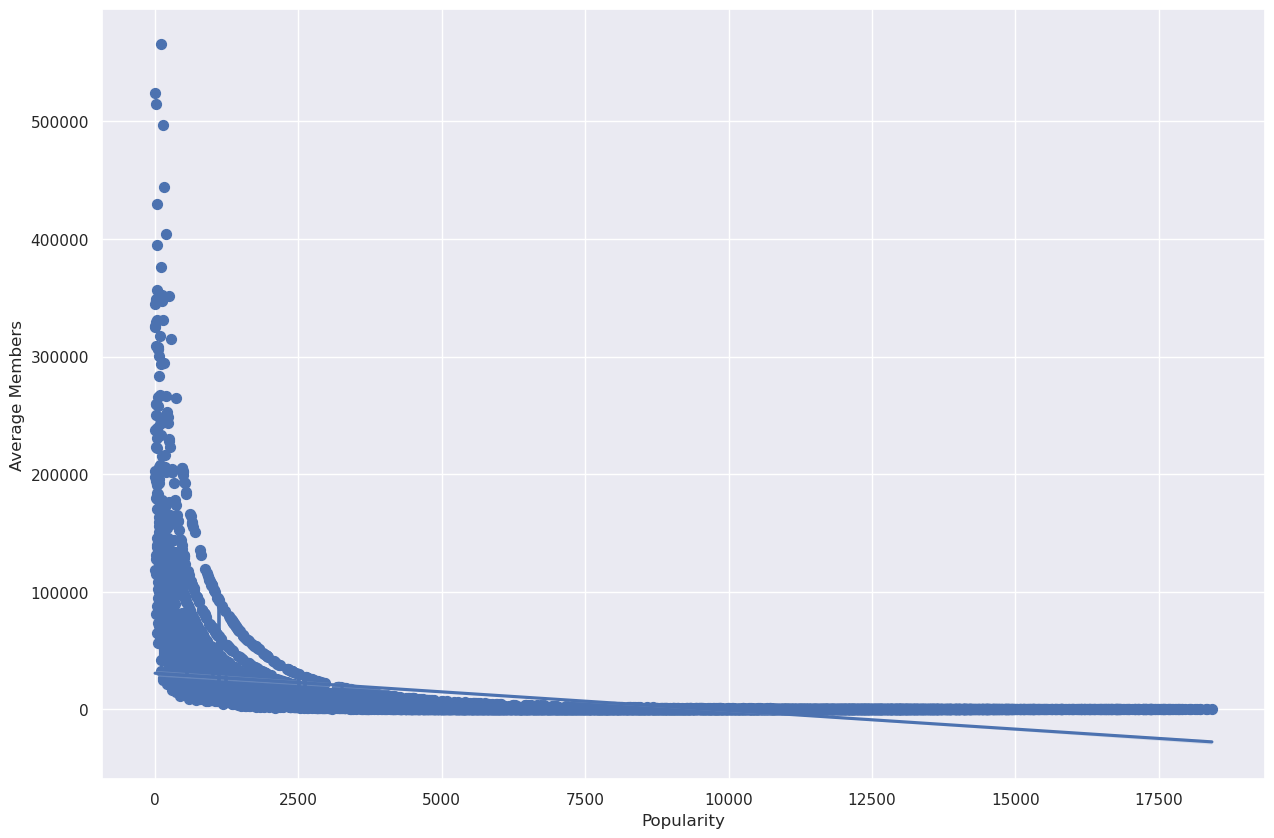

In [16]:
plt.figure(figsize=(15, 10))
sns.regplot(x = "Popularity", y = "Average Members", data = pop_mem_df, x_estimator = np.mean)

***Nhận xét:***

Nhìn vào biểu đồ tương quan trên ta có thể thấy mức độ phổ biến có tác động đến lượng người xem. Khi giá trị độ phổ biến càng tăng thì lượng người xem cũng giảm dần.\
Tuy nhiên trên thực tế vì giá trị độ phổ biến đại diện cho xếp hạng sự phổ biến nên khi giá trị này tăng có nghĩa là độ phổ biến giảm dần. Điều này có nghĩa là người dùng có xu hướng lựa chọn một bộ anime đang "hot". Vậy nên nếu một bộ anime được quảng bá và được phổ biến rộng rãi đến nhiều đối tượng thì số người vì tò mò mà xem bộ anime này cũng sẽ tăng và ngược lại.

### Câu 2: Xu hướng xem anime của mọi người ở thời điểm hiện tại là gì? Một bộ anime gồm những yếu tố nào (kinh dị, trinh thám,...) có thể thu hút người xem?

***Ý nghĩa câu hỏi:*** Trả lời được câu hỏi này, ta có thể được cái nhìn tổng quan về các thể loại anime được quan tâm trong ngành công nghiệp phim những năm gần đây ngoài ra còn đáp ứng nhu cầu các nhóm đối tượng dưới đây:
- Nhà sản xuất: Nắm rõ được yếu tố nào đáp ứng thị hiếu người xem. Từ đó có thể sản xuất ra bộ anime với yếu tố phù hợp, đem lại doanh thu.
- Nhà đầu tư: Lựa chọn những bộ anime có thể loại phù hợp thị hiếu người dùng từ đó phán đoán xem có nên đầu tư vào bộ anime hay không.

***Trả lời:*** 

Vì xu hướng xem anime sẽ thay đổi theo thời gian và ta đang cần xem xét xu hướng xem anime của mọi người thời hiện tại nên ta sẽ lọc và chọn ra dữ liệu của những bộ phim sản xuất từ thời điểm 2010 trở đi và lưu vào dataframe `mod_animes_df`. Sau đó lọc lấy 3 cột là `Genres`, `Members`, `From` và lưu vào dataframe mới là `mod_genres_df`.

In [17]:
mod_animes_df = anime_df[pd.DatetimeIndex(anime_df['From']).year >= 2010].dropna()
mod_genres_df = mod_animes_df[['Genres', 'Members', 'From']]
mod_genres_df

,Genres,Members,From
1,"[Adventure, Fantasy, Action]",310979,2022-10-11
2,"[Comedy, Romance]",703336,2022-04-09
3,"[Drama, Sci-Fi, Suspense]",2338343,2011-04-06
4,"[Sci-Fi, Comedy, Action]",567213,2015-04-08
5,"[Drama, Action]",1972472,2019-04-29
...,...,...,...
9980,[Comedy],1048,2011-04-13
9982,"[Comedy, Ecchi]",38808,2011-01-04
9987,"[Adventure, Fantasy, Action]",36447,2020-04-05
9988,"[Slice of Life, Comedy]",639,2019-04-02


Ta tính lượng người xem trung bình của từng thể loại và lưu vào dataframe `genres_df`

In [18]:
# Lấy năm hiện tại
current_year = datetime.now().year

# Tính số năm từ "From" đến năm hiện tại
mod_genres_df['Years'] = current_year - mod_genres_df['From'].dt.year

# Tính số lượng người xem trung bình cho từng thể loại
genres_avg_members = {}
for idx, row in mod_genres_df.iterrows():
    for genre in row['Genres']:
        if genre not in genres_avg_members:
            genres_avg_members[genre] = []
        genres_avg_members[genre].append(row['Members'] / row['Years'])

# Tính số lượng người xem trung bình cho từng thể loại
result = {genre: sum(avg_members) / len(avg_members) for genre, avg_members in genres_avg_members.items()}

genres_df = pd.DataFrame(list(result.items()), columns=['Genre', 'Average Members'])
genres_df

,Genre,Average Members
0,Adventure,50609.187485
1,Fantasy,53616.265423
2,Action,51815.642079
3,Comedy,32260.983736
4,Romance,51704.191621
5,Drama,56745.967123
6,Sci-Fi,31199.684201
7,Suspense,106416.914126
8,Supernatural,43624.726394
9,Slice of Life,16251.523062


Xem xét lại các thể loại phim

In [19]:
genres_df['Genre'].unique()

array(['Adventure', 'Fantasy', 'Action', 'Comedy', 'Romance', 'Drama',
       'Sci-Fi', 'Suspense', 'Supernatural', 'Slice of Life', 'Mystery',
       'Sports', 'Ecchi', 'Award Winning', 'Boys Love', 'Horror',
       'Gourmet', 'Avant Garde', 'Girls Love'], dtype=object)

***Nhận xét***: Ta cần loại bỏ: Award winning, Avant Garde.\
Đây là 2 thể loại không cần thiết để đưa vào danh sách xem xét vì:
- Award winning: các bộ phim đạt giải
- Avant Garde: các bộ phim tiên phong (cho các thể loại phim mới).\

Đây là hai thể loại khác với những thể loại rõ ràng tường minh

In [20]:
genres_df = genres_df[~genres_df['Genre'].isin(['Award Winning', 'Avant Garde'])]

In [21]:
genres_df

,Genre,Average Members
0,Adventure,50609.187485
1,Fantasy,53616.265423
2,Action,51815.642079
3,Comedy,32260.983736
4,Romance,51704.191621
5,Drama,56745.967123
6,Sci-Fi,31199.684201
7,Suspense,106416.914126
8,Supernatural,43624.726394
9,Slice of Life,16251.523062


Ta thực hiện sắp xếp lại dữ liệu theo hướng giảm dần sau đó trực quan hòa bằng bar chart

In [26]:
genres_df = genres_df.sort_values(by='Average Members', ascending = False)

Trực quan hóa bằng biểu đồ:

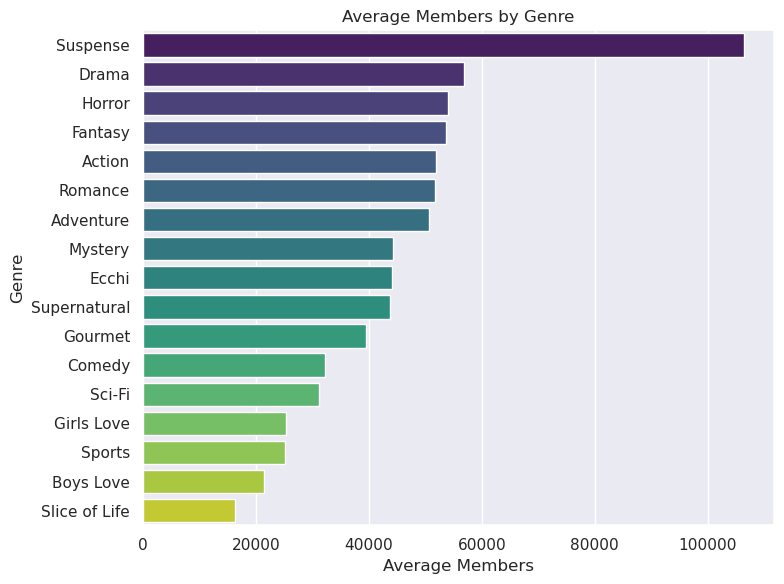

In [28]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Average Members', y='Genre', data = genres_df, palette='viridis')
plt.xlabel('Average Members')
plt.ylabel('Genre')
plt.title('Average Members by Genre')
plt.tight_layout()
plt.show()

***Nhận xét:***

- Từ bar chart trên ta có thể thấy nếu có yếu tố `Suspense` trong anime thì có thể thu hút nhiều người xem từ đó đem lại nguồn lợi nhuận tốt hơn. Ngoài ra ta còn có thể cân nhắc các yếu tố khác như `Drama`, `Horror`, `Fantasy`,...

 ### Câu hỏi 3: Top 5 Các Studio nào đang có sự áp đảo về điểm số (chất lượng) cũng như số lượng người xem, và thể loại của các studio đó là gì?

*Ý nghĩa trả lời cho câu hỏi* : Giúp người xem có thể cân nhắc việc lựa chọn 1 studio phim anime để mang lại trải nghiệm tốt nhất cho thể loại yêu thích của họ

Tính số điểm trung bình mỗi studio

In [ ]:
df1=df[['Score','Studios','Members']].copy()
df1=df1.Studios.apply(pd.Series).merge(df1,right_index=True,left_index=True)
df1=df1.melt(id_vars=['Score','Members','Studios'],value_name="Studio")
df1=df1.drop(["variable","Studios"],axis=1).dropna()
df1=df1.groupby(['Studio'])[['Score','Members']].mean().reset_index()
df1

### Biểu đồ thể hiện mật độ điểm số trung bình của các studio

In [ ]:
plt.subplots(figsize=(18,8))
sns.histplot(data=df1,x="Score",kde=True,binwidth=0.1)

***Nhận xét***
Mật độ studio tập trung nhiều ở múc điểm 6.3~7.0, điểm được đánh giá là khá cao vì không dưới trung bình, vẫn xuất hiện những studio được đánh giá với điểm trung bình cao (lên tới 8.3, 8.4, 8.5) nhưng không nhiều cho thấy các studio duy trì được phong độ ở các bộ phim là không cao tuy nhiên vẫn được chào đón.

In [ ]:
# Top 5 Score
top=5
df1.sort_values(by=['Score'],ascending=False,ignore_index=True)[:top][['Studio','Score']]

In [ ]:
# Top 5 Score
top=5
df1.sort_values(by=['Members'],ascending=True,ignore_index=True)[:top][['Studio','Members']]

In [ ]:
# Tinh tuong quan theo % cua 2 cot Score va Members
# Final-Score = %Score  + %Members
df1['Final-Score'] = df1['Score']/df1['Score'].sum()+df1['Members']/df1['Members'].sum()
df1.sort_values(by=['Final-Score'], ascending=False,
                ignore_index=True, inplace=True)
df1.head(10)

#### Biểu đồ thể hiện Top 10 studios có điểm và độ nổi tiếng cao

In [ ]:
# Top 10 studios có điểm và độ nổi tiếng cao
show_amount=10
fig,axis=plt.subplots(figsize=(28,10))
sns.barplot(
    data=df1[:show_amount],
x="Studio",y="Score",color="blue",
ax=axis)
axis2=axis.twinx()
sns.pointplot(data=df1[:show_amount],
            x="Studio",
            y="Members",
            color='orange',
            ax=axis2)